In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
mrt_entry_df = pd.read_json("cleaned-data/mrt_entry_data.json")
mrt_exit_df = pd.read_json("cleaned-data/mrt_exit_data.json")

In [52]:
mrt_entry_df

,date,time,North Ave,Quezon Ave,GMA Kamuning,Cubao,Santolan,Ortigas,Shaw Blvd,Boni Ave,Guadalupe,Buendia,Ayala Ave,Magallanes,Taft
0,2019-01-01,06:00 - 06:59,376.0,152,72,239,15,36.0,180,74,95.0,53.0,181.0,186,392
1,2019-01-01,07:00 - 07:59,471.0,214,75,413,17,68.0,260,173,203.0,96.0,333.0,278,651
2,2019-01-01,08:00 - 08:59,675.0,236,117,454,21,64.0,330,150,292.0,77.0,237.0,223,776
3,2019-01-01,09:00 - 09:59,971.0,257,134,640,41,59.0,407,179,372.0,52.0,243.0,216,997
4,2019-01-01,10:00 - 10:59,1575.0,463,200,866,48,82.0,503,310,528.0,61.0,188.0,282,1505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26556,2022-09-30,19:00 - 19:59,1879.0,698,1265,2702,507,2239.0,3940,1573,1703.0,615.0,2796.0,1655,2602
26557,2022-09-30,20:00 - 20:59,1529.0,493,931,2123,305,1695.0,2698,1119,1420.0,414.0,2260.0,1079,2288
26558,2022-09-30,21:00 - 21:59,518.0,242,476,1136,287,1215.0,2304,680,936.0,231.0,1630.0,643,1480
26559,2022-09-30,22:00 - 22:59,0.0,7,23,136,62,643.0,531,136,172.0,18.0,347.0,81,66


In [53]:
mrt_exit_df

,date,time,North Ave,Quezon Ave,GMA Kamuning,Cubao,Santolan,Ortigas,Shaw Blvd,Boni Ave,Guadalupe,Buendia,Ayala Ave,Magallanes,Taft
0,2019-01-01,06:00 - 06:59,13.0,1.0,6,22,16,16.0,62.0,43.0,56,5.0,29,42,99.0
1,2019-01-01,07:00 - 07:59,240.0,187.0,48,525,43,135.0,327.0,148.0,280,90.0,266,160,760.0
2,2019-01-01,08:00 - 08:59,382.0,159.0,67,627,42,152.0,341.0,190.0,281,65.0,226,127,602.0
3,2019-01-01,09:00 - 09:59,456.0,149.0,72,595,60,149.0,478.0,189.0,358,68.0,417,178,1063.0
4,2019-01-01,10:00 - 10:59,600.0,198.0,84,842,83,268.0,642.0,228.0,533,80.0,594,165,1067.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26556,2022-09-30,19:00 - 19:59,2769.0,1150.0,2603,4587,214,1151.0,2788.0,1792.0,2260,358.0,1906,699,4052.0
26557,2022-09-30,20:00 - 20:59,1972.0,864.0,1934,3218,132,940.0,2336.0,1545.0,1609,280.0,1601,616,2944.0
26558,2022-09-30,21:00 - 21:59,1341.0,665.0,1495,2419,96,651.0,1716.0,1160.0,1245,295.0,1171,513,1937.0
26559,2022-09-30,22:00 - 22:59,505.0,372.0,869,1049,76,106.0,368.0,272.0,131,21.0,57,11,121.0


In [54]:
def create_datetime(df):
    df["year"] = df["date"].apply(lambda x: x.year)
    df["month"] = df["date"].apply(lambda x: x.month)
    df["day"] = df["date"].apply(lambda x: x.isoweekday())
    df["hour"] = df.time.apply(lambda x: x.split("-")[0])
    df["date"] = df["date"].astype("str")
    df["datetime"] = pd.to_datetime(df.date + " " + df.hour)
    
    return df

mrt_entry_df = create_datetime(mrt_entry_df)
mrt_exit_df = create_datetime(mrt_exit_df)

In [55]:
def format_df(df):
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(" ", "_", regex=True)
    df = df.set_index("datetime", drop=True).sort_index()
    df = df.drop(columns="time")
    df = df[['date', 'year', 'month', 'day', 'hour', 'north_ave', 'quezon_ave', 
             'gma_kamuning', 'cubao', 'santolan', 'ortigas', 'shaw_blvd', 'boni_ave', 
             'guadalupe', 'buendia', 'ayala_ave', 'magallanes', 'taft']]
    
    return df

mrt_entry_df = format_df(mrt_entry_df)
mrt_exit_df = format_df(mrt_exit_df)

In [60]:
stations = ['north_ave', 
            'quezon_ave', 
            'gma_kamuning', 
            'cubao', 
            'santolan', 
            'ortigas', 
            'shaw_blvd', 
            'boni_ave', 
            'guadalupe', 
            'buendia', 
            'ayala_ave', 
            'magallanes', 
            'taft', 
            ]

<Axes: xlabel='year'>

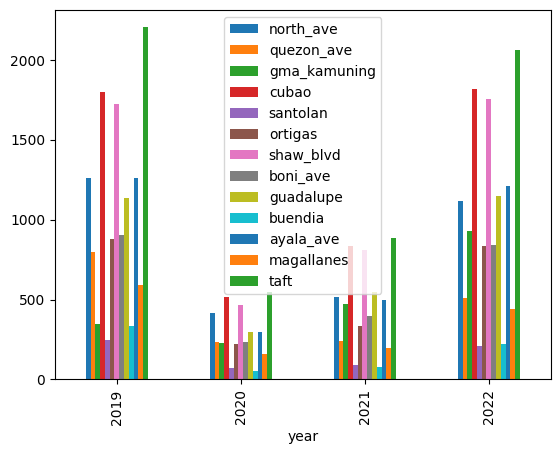

In [95]:
mrt_exit_df.groupby("year")[stations].median().plot(kind="bar")

<Axes: xlabel='day'>

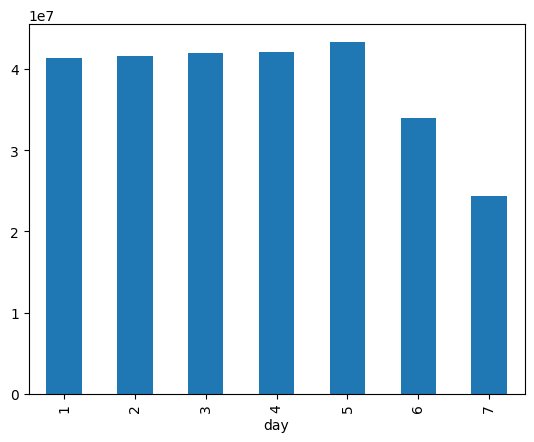

In [87]:
mrt_entry_df.groupby("day")[stations].sum().sum(axis=1).plot(kind="bar")

<Axes: xlabel='month'>

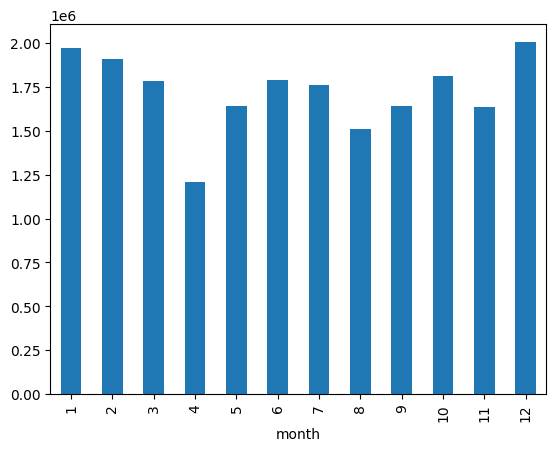

In [94]:
mrt_entry_df.groupby("month")[stations].sum().mean(axis=1).plot(kind="bar")